In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer

<h1>read Data</h1>

In [2]:
df= pd.read_csv("heart_disease.csv",sep=",")

In [3]:
df

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0                  NaN  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ... 

<h1>Data Info</h1>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
df.describe()

Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0.003647   
25%       5.449866          176.000000            99.000000     3.674126   
50%       7.003252          250.000000           120.000000     7.472164   
75%       8.531577          326.000000           141.000000    11.255592   
max       9.999952          400.000000           160.000000    14.997087   

       Homocysteine Level  
count         9980.000000  
mean            12.456271  
std              4.323426  
min              5.000236  
25%              8.723334  
50%             12.409395  
75%             16.140564  
max             19.999037

<h1>null value</h1>

In [6]:
df.isnull().mean()*100

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64

<h1>corr</h1>

<Axes: >

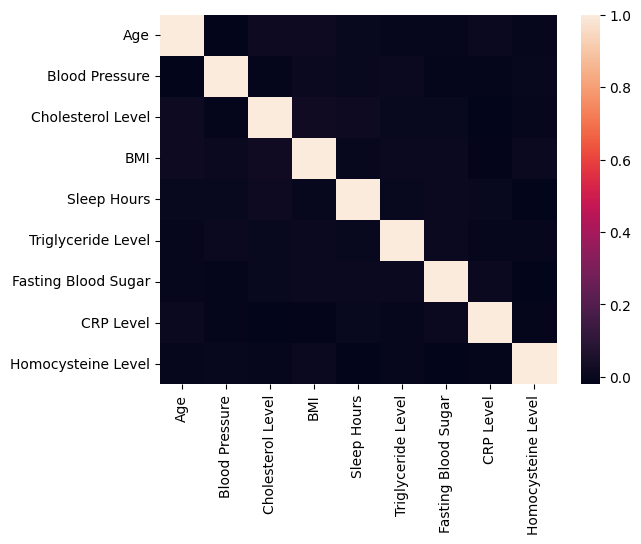

In [7]:
sns.heatmap(df.select_dtypes(include="number").corr())

<h1>outlier</h1>

In [8]:
px.box(data_frame=df,y="Age")

In [9]:
px.box(data_frame=df,x="Cholesterol Level")

In [10]:
px.box(data_frame=df,x="BMI")

In [11]:
px.box(data_frame=df,x="Sleep Hours")

In [12]:
px.box(data_frame=df,x="Blood Pressure")

In [13]:
px.box(data_frame=df,x="Triglyceride Level")

In [14]:
px.box(data_frame=df,x="Fasting Blood Sugar")

In [15]:
px.box(data_frame=df,x="CRP Level")

In [16]:
px.box(data_frame=df,x="Homocysteine Level")

<h1>fill null</h1>

In [17]:
imp = SimpleImputer(strategy="most_frequent")
imp1 = KNNImputer(n_neighbors=3)

In [18]:
df["Alcohol Consumption"].value_counts(normalize=True)

Alcohol Consumption
Medium    0.337200
Low       0.335581
High      0.327219
Name: proportion, dtype: float64

In [20]:
df["Age"].value_counts().sort_values(ascending=False)

Age
71.0    187
64.0    185
34.0    182
43.0    182
62.0    181
       ... 
67.0    140
60.0    139
24.0    132
44.0    128
48.0    121
Name: count, Length: 63, dtype: int64

In [95]:
values = ["High", "Medium", "Low"] 
weights = [0.33, 0.34, 0.33] 
df.loc[df['Alcohol Consumption'].isnull(), 'Alcohol Consumption'] = np.random.choice(values, size=df['Alcohol Consumption'].isnull().sum(), p=weights)

In [96]:
df.select_dtypes('O').drop(columns=["Alcohol Consumption"])

Gender Exercise Habits Smoking Family Heart Disease Diabetes  \
0       Male            High     Yes                  Yes       No   
1     Female            High      No                  Yes      Yes   
2       Male             Low      No                   No       No   
3     Female            High     Yes                  Yes       No   
4       Male             Low     Yes                  Yes      Yes   
...      ...             ...     ...                  ...      ...   
9995  Female          Medium     Yes                   No       No   
9996    Male          Medium      No                   No       No   
9997    Male            High     Yes                   No      Yes   
9998    Male             Low     Yes                   No      Yes   
9999  Female          Medium     Yes                  Yes      Yes   

     High Blood Pressure Low HDL Cholesterol High LDL Cholesterol  \
0                    Yes                 Yes                   No   
1                     No                 Yes                   No   
2                     No                 Yes                  Yes   
3                    Yes                  No                  Yes   
4                    Yes                  No                   No   
...                  ...                 ...                  ...   
9995                 Yes                  No                  Yes   
9996                 Yes                  No                  Yes   
9997                  No                 Yes                  Yes   
9998                 Yes                  No                  Yes   
9999                  No                 Yes                  Yes   

     Stress Level Sugar Consumption Heart Disease Status  
0          Medium            Medium                   No  
1            High            Medium                   No  
2             Low               Low                   No  
3            High              High                   No  
4            High              High                   No  
...           ...               ...                  ...  
9995         High            Medium                  Yes  
9996         High               Low                  Yes  
9997          Low               Low                  Yes  
9998         High            Medium                  Yes  
9999       Medium              High                  Yes  

[10000 rows x 11 columns]

In [97]:
df[df.select_dtypes('O').drop(columns=["Alcohol Consumption"]).columns]=imp.fit_transform(df.select_dtypes('O').drop(columns=["Alcohol Consumption"]))

In [98]:
df[df.select_dtypes('number').columns[1:]]

Blood Pressure  Cholesterol Level        BMI  Sleep Hours  \
0              153.0              155.0  24.991591     7.633228   
1              146.0              286.0  25.221799     8.744034   
2              126.0              216.0  29.855447     4.440440   
3              122.0              293.0  24.130477     5.249405   
4              166.0              242.0  20.486289     7.030971   
...              ...                ...        ...          ...   
9995           136.0              243.0  18.788791     6.834954   
9996           172.0              154.0  31.856801     8.247784   
9997           152.0              201.0  26.899911     4.436762   
9998           142.0              299.0  34.964026     8.526329   
9999           128.0              193.0  25.111295     5.659394   

      Triglyceride Level  Fasting Blood Sugar  CRP Level  Homocysteine Level  
0                  342.0                  NaN  12.969246           12.387250  
1                  133.0                157.0   9.355389           19.298875  
2                  393.0                 92.0  12.709873           11.230926  
3                  293.0                 94.0  12.509046            5.961958  
4                  263.0                154.0  10.381259            8.153887  
...                  ...                  ...        ...                 ...  
9995               343.0                133.0   3.588814           19.132004  
9996               377.0                 83.0   2.658267            9.715709  
9997               248.0                 88.0   4.408867            9.492429  
9998               113.0                153.0   7.215634           11.873486  
9999               121.0                149.0  14.387810            6.208531  

[10000 rows x 8 columns]

In [99]:
df=df[~df["Blood Pressure"].isnull()]

In [100]:
df[["Age"]] = imp.fit_transform(df[["Age"]])
df[df.select_dtypes('number').columns[1:]] = imp1.fit_transform(df.select_dtypes('number').iloc[:,1:])

In [101]:
df.isnull().mean()*100

Age                     0.0
Gender                  0.0
Blood Pressure          0.0
Cholesterol Level       0.0
Exercise Habits         0.0
Smoking                 0.0
Family Heart Disease    0.0
Diabetes                0.0
BMI                     0.0
High Blood Pressure     0.0
Low HDL Cholesterol     0.0
High LDL Cholesterol    0.0
Alcohol Consumption     0.0
Stress Level            0.0
Sleep Hours             0.0
Sugar Consumption       0.0
Triglyceride Level      0.0
Fasting Blood Sugar     0.0
CRP Level               0.0
Homocysteine Level      0.0
Heart Disease Status    0.0
dtype: float64

In [102]:
df[~df["Cholesterol Level"].isnull()][['Cholesterol Level','High LDL Cholesterol','Low HDL Cholesterol']]

Cholesterol Level High LDL Cholesterol Low HDL Cholesterol
0                 155.0                   No                 Yes
1                 286.0                   No                 Yes
2                 216.0                  Yes                 Yes
3                 293.0                  Yes                  No
4                 242.0                   No                  No
...                 ...                  ...                 ...
9995              243.0                  Yes                  No
9996              154.0                  Yes                  No
9997              201.0                  Yes                 Yes
9998              299.0                  Yes                  No
9999              193.0                  Yes                 Yes

[9981 rows x 3 columns]

In [103]:
df["Heart Disease Status"]=df["Heart Disease Status"].apply(lambda x:1 if x == "Yes" else 0)

In [104]:
df

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes              Medium         High    8.247784   
9997                  Yes                 Low          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0           130.666667  12.969246   
1                Medium              133.0           157.000000   9.355389   
2                   Low              393.0            92.000000  12.709873   
3                  High              293.0            94.000000  12.509046   
4                  High              263.0           154.000000  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0           133.000000   3.588814   
9996                Low              377.0            83.000000   2.658267   
9997                Low              248.0            88.000000   4.408867   
9998             Medium              113.0           153.000000   7.215634   
9999               High              121.0           149.000000  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                     0  
1              19.298875                     0  
2              11.230926                     0  
3               5.961958                     0  
4               8.153887                     0  
...                  ... 

<h1>New column Age_Group</h1>

In [26]:
bins = [18, 30, 40, 50, 60, 81] 
labels = ['18-29', '30-39', '40-49', '50-59', '60-80'] 
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_Group']

0       50-59
1       60-80
2       40-49
3       30-39
4       60-80
        ...  
9995    18-29
9996    30-39
9997    60-80
9998    18-29
9999    30-39
Name: Age_Group, Length: 10000, dtype: category
Categories (5, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-80']

<h1>Save File</h1>

In [106]:
df.to_csv("heart_disease_ubdate.csv")